In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

This project using datasets from Kaggle : https://www.kaggle.com/datasets/andrewmvd/udemy-courses

For the data visualization, Im using Looker Studio by Google. Check it here : https://lookerstudio.google.com/reporting/c5a0c72e-b99b-4262-8ebd-a631b6e13e69

In [2]:
course_df = pd.read_csv('/Users/apple/Documents/Project 2/udemy_courses.csv')
course_df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [3]:
def fix_paid_columns(x):
    if x == 'TRUE':
        return('True')
    elif x == 'FALSE':
        return('False')
    else:
        return(x)

In [4]:
course_df['is_paid']    = course_df['is_paid'].apply(fix_paid_columns)
course_df['engagement'] = course_df['num_reviews'] / course_df['num_subscribers']

In [5]:
course_df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
engagement             float64
dtype: object

In [14]:
free_course_df = pd.DataFrame(\
                            course_df[(course_df['is_paid'] == False)]\
                    .sort_values('num_reviews',ascending=False))

free_course_df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,engagement
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,0.032087
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development,0.065866
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development,0.049247
3325,405926,HTML and CSS for Beginners - Build a Website &...,https://www.udemy.com/html-and-css-for-beginne...,False,0,70773,5660,50,All Levels,6.0,2015-03-19T19:07:12Z,Web Development,0.079974
3385,707962,Javascript Essentials,https://www.udemy.com/javascript-essentials/,False,0,47062,5590,41,Beginner Level,8.5,2016-01-20T19:08:27Z,Web Development,0.118779


In [15]:
top10_free = free_course_df.sort_values("num_subscribers", ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

top10_free

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,engagement
0,0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,False,0,65576,936,24,All Levels,8.0,2013-04-20T02:25:22Z,Business Finance,0.014274
1,1,405926,HTML and CSS for Beginners - Build a Website &...,https://www.udemy.com/html-and-css-for-beginne...,False,0,70773,5660,50,All Levels,6.0,2015-03-19T19:07:12Z,Web Development,0.079974
2,2,65330,Web Development By Doing: HTML / CSS From Scratch,https://www.udemy.com/web-development-learn-by...,False,0,72932,2575,21,Beginner Level,1.0,2013-09-25T00:42:09Z,Web Development,0.035307
3,3,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,False,0,73110,1716,22,All Levels,2.0,2012-07-27T12:54:57Z,Web Development,0.023471
4,4,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19T03:02:05Z,Web Development,0.054910
5,5,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development,0.065866
6,6,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15T17:00:33Z,Musical Instruments,0.010301
7,7,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development,0.049247
8,8,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development,0.001733
9,9,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,0.032087


In [33]:
top10_free.to_csv('/Users/apple/Documents/Project 2/top10_free.csv', encoding = 'utf-8-sig',index=False)

In [16]:
subject_free = free_course_df['subject'].unique()
print (subject_free)

['Web Development' 'Business Finance' 'Graphic Design'
 'Musical Instruments']


In [10]:
top10_WebD = pd.DataFrame(\
                    course_df[(course_df['subject']=='Web Development')]\
                .groupby(by=["course_title"])["num_subscribers"]\
                .sum()\
                .sort_values(ascending=False)
                .head(10))
top10_WebD

,num_subscribers
course_title,
Learn HTML5 Programming From Scratch,268923
Coding for Entrepreneurs Basic,161029
The Web Developer Bootcamp,121584
Build Your First Website in 1 Week with HTML5 and CSS3,120291
The Complete Web Developer Course 2.0,114512
Web Design for Web Developers: Build Beautiful Websites!,98867
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours,86570
Learn Javascript & JQuery From Scratch,84897
Practical PHP: Master the Basics and Code Dynamic Websites,83737


In [11]:
top10_BF = pd.DataFrame(\
                    course_df[(course_df['subject']=='Business Finance')]\
                .groupby(by=["course_title"])["num_subscribers"]\
                .sum()\
                .sort_values(ascending=False)
                .head(10))
top10_BF

,num_subscribers
course_title,
Bitcoin or How I Learned to Stop Worrying and Love Crypto,65576
Accounting in 60 Minutes - A Brief Introduction,56659
Stock Market Investing for Beginners,50855
Introduction to Financial Modeling,29167
The Complete Financial Analyst Course 2017,24481
Forex Basics,22344
Beginner to Pro in Excel: Financial Modeling and Valuation,22257
Black Algo Trading: Build Your Trading Robot,20195
Financial Analysis: A Recipe for Success,19614


In [12]:
top10_GD = pd.DataFrame(\
                    course_df[(course_df['subject']=='Graphic Design')]\
                .groupby(by=["course_title"])["num_subscribers"]\
                .sum()\
                .sort_values(ascending=False)
                .head(10))
top10_GD

,num_subscribers
course_title,
Photoshop In-Depth: Master all of Photoshop's Tools Easily,53851
Figure Drawing From Life Using The Reilly Technique.,47811
Professional Logo Design in Adobe Illustrator,44044
Photoshop for Entrepreneurs - Design 11 Practical Projects,36288
Logo Design Essentials,33205
The Ultimate Drawing Course - Beginner to Advanced,26742
Logo Designing for Your Business in an Hour,25277
How To Make Graphics For A Website,24857
Learn to Design a Letterhead - A Beginners Course,24687


In [13]:
top10_MI = pd.DataFrame(\
                    course_df[(course_df['subject']=='Musical Instruments')]\
                .groupby(by=["course_title"])["num_subscribers"]\
                .sum()\
                .sort_values(ascending=False)
                .head(10))
top10_MI

,num_subscribers
course_title,
Free Beginner Electric Guitar Lessons,101154
Pianoforall - Incredible New Way To Learn Piano & Keyboard,75499
Getting Started with Playing Guitar,47652
Complete Guitar System - Beginner to Advanced,32935
Learn Guitar in 21 Days,26504
The Professional Guitar Masterclass,21701
Introduction to Piano - By PGN Piano!,14922
Best Beginner Guitar Lessons by Sam Lyons,14560
Acoustic Guitar Basics,14495


In [10]:
total_sub = pd.DataFrame(\
            course_df.groupby(by=["subject"])["num_subscribers"]\
                    .sum()\
                    .sort_values(ascending=False))
total_sub

,num_subscribers
subject,
Web Development,7980572
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689


In [34]:
total_sub.to_csv('/Users/apple/Documents/Project 2/total_sub.csv', encoding = 'utf-8-sig',index=False)

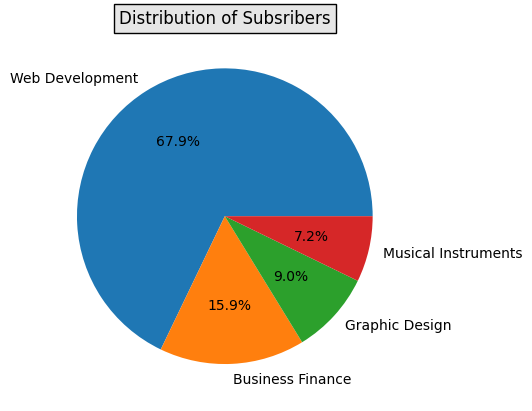

In [28]:
y = np.array(total_sub["num_subscribers"])

plt.pie(y, labels = subject_free, autopct='%1.1f%%')
plt.title("Distribution of Subsribers", bbox={'facecolor':'0.9'})
plt.show()

In [29]:
top25_paid = pd.DataFrame(course_df[(course_df['is_paid']==True)]\
                            .sort_values(by=['num_subscribers'],ascending=False))
top25_paid

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,engagement
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.000000,2015-11-02T21:13:27Z,Web Development,0.225729
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.500000,2016-03-08T22:28:36Z,Web Development,0.195717
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.000000,2013-10-10T15:19:29Z,Web Development,0.031627
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.500000,2015-03-12T23:19:54Z,Web Development,0.213234
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.000000,2014-08-07T06:27:51Z,Musical Instruments,0.101670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance,NaN
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance,NaN
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,2017-07-06T21:46:30Z,Business Finance,NaN
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,2017-07-03T21:40:32Z,Business Finance,NaN


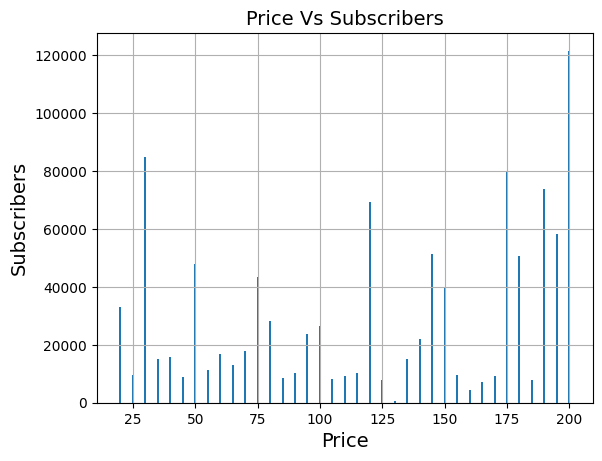

In [30]:
plt.bar(top25_paid['price'], top25_paid['num_subscribers'])
plt.title('Price Vs Subscribers', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Subscribers', fontsize=14)
plt.grid(True)
plt.show()

In [31]:
from sqlite3 import connect
conn = connect(':memory:')
course_df.to_sql('course',conn, index=False, if_exists='replace')

3678

In [32]:
data_analysis_python = pd.read_sql(""" SELECT course_title, price, num_subscribers
                                       FROM course
                                       WHERE course_title LIKE '%Python%'
                                       ORDER BY 3 DESC  """, conn)
data_analysis_python

,course_title,price,num_subscribers
0,Web Programming with Python,50,35267
1,"Coding for Entrepreneurs: Learn Python, Django...",195,23412
2,Learn Python and Django: Payment Processing,70,17714
3,Python and Django Full Stack Web Developer Boo...,200,11832
4,Fun and creative web engineering with Python a...,0,10917
5,The Complete Ethical Hacking Course 2.0: Pytho...,195,7827
6,Complete Python Web Course: Build 8 Python Web...,110,7489
7,Try Django 1.9 | Build a Blog and Learn Python...,50,7407
8,Python for Beginners: Python Programming Langu...,150,6153
9,REST APIs with Flask and Python,110,5151


/var/folders/f_/96861gln1q90fs6nkm_n2hlw0000gn/T/ipykernel_3793/2283922379.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'num_subscribers', data = data_analysis_python, color = 'orange', edgecolor='black', ci=False)


<Axes: xlabel='price', ylabel='num_subscribers'>

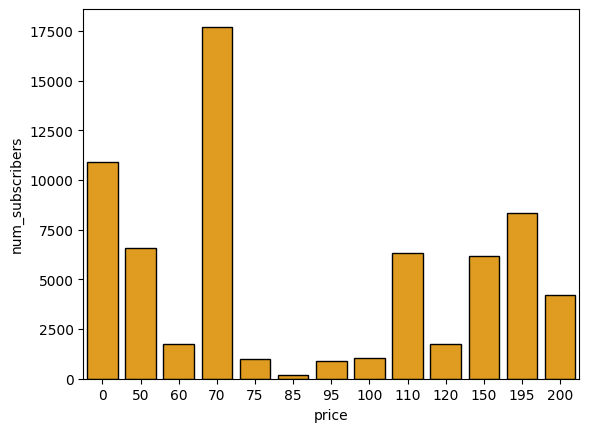

In [44]:
sns.barplot(x = 'price', y = 'num_subscribers', data = data_analysis_python, color = 'orange', edgecolor='black', ci=False)

In [35]:
freevspaid = pd.DataFrame(course_df\
                        .groupby(by=["is_paid"])["num_subscribers"]\
                        .sum())
freevspaid

,num_subscribers
is_paid,
False,3575525
True,8183595


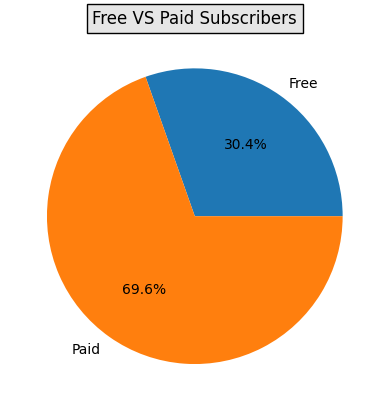

In [36]:
y = np.array(freevspaid["num_subscribers"])

plt.pie(y, labels = ["Free", "Paid"], autopct='%1.1f%%')
plt.title("Free VS Paid Subscribers", bbox={'facecolor':'0.9'})
plt.show()

In [37]:
freevspaid.to_csv('/Users/apple/Documents/Project 2/freevspaid.csv', encoding = 'utf-8-sig',index=False)